In [1]:
import pandas as pd
from openpyxl import load_workbook
from IPython.display import Image
from sklearn.preprocessing import Imputer
from sklearn import tree
from subprocess import check_call
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
#mengimport library yg digunakan untuk load data excel dan library lainnya yg digunakan untuk proses clustering

In [2]:
wb = pd.read_excel('datafix.xlsx', 'Sheet1')

df =wb
df.sample(10)
#load data excel yg akan digunakan untuk diclustering

,SNo,BookingDate,ID,STTNo,Shipper,OriginCity,DestinationCity,ForwardArea,Product,GrossWt,VolumeWt,CommodityName,LastTrackingStatus
2551,111221007,06-Jun-2018,JOG-1932,11-18-952274,DESTARAFI PERDANA,JOGJAKARTA,BIMA,NaN,REGPACK,5,3,DOCUMENT,RECEIPT BY SALIM FUADY .
3160,111486515,13-Jul-2018,JOG-1932,11-18-1131659,PARADIGMA BOKOE,JOGJAKARTA,MAKASAR,NaN,REGPACK,3,1,BOOK / BUKU,RECEIPT BY ITSUR .
1731,110982772,12-May-2018,JOG-1932,10-17-1617857,OUTLET GREEN,JOGJAKARTA,LOMBOK,NaN,REGPACK,49,32,CLOTHING/GARMENT,RECEIPT BY ANDI .
2528,111217932,06-Jun-2018,JOG-1932,11-18-949713,THERESIA WIDI,JOGJAKARTA,MERAUKE,NaN,REGPACK,1,1,MEDICINE NON LIQUID,RECEIPT BY BAPAK YULIUS BETAUBUN .
1535,110916415,03-May-2018,JOG-1932,11-18-712925,SABRINASHOPPIE,JOGJAKARTA,LAMPUNG,NaN,REGPACK,1,1,CLOTHING/GARMENT,RECEIPT BY ANGGUN APRIANDARI .
2628,111247092,08-Jun-2018,JOG-1932,11-18-971530,OUTLET GREEN,JOGJAKARTA,SAMARINDA,NaN,REGPACK,5,3,CLOTHING/GARMENT,RECEIPT BY ARI
72,110483104,05-Mar-2018,JOG-1932,10-17-1618157,ADI PMA,JOGJAKARTA,TANJUNG SELOR,NaN,REGPACK,9,7,CLOTHING/GARMENT,RECEIPT BY SOFYAN .
2026,111060073,22-May-2018,JOG-1932,11-18-834271,OKIDOKI WEDDING CARD,JOGJAKARTA,TARAKAN,NaN,REGPACK,13,5,CETAKAN BROSUR STIKER UNDANGAN,RECEIPT BY SALAH SALUR
3536,111673178,30-Jul-2018,JOG-1932,11-18-1278368,LUKAS,JOGJAKARTA,AMBON,NaN,REGPACK,5,4,CLOTHING/GARMENT,RECEIPT BY LUKAS .
1779,110995911,14-May-2018,JOG-1932,11-18-780851,OLSHOP,JOGJAKARTA,NABIRE,NaN,REGPACK,1,1,CLOTHING/GARMENT,RECEIPT BY EZA .


In [3]:


d = df[['SNo', 'Product', 'GrossWt', 'VolumeWt']]
d = d.dropna(axis=0, how='any')
d.columns = ['SNo', 'Product', 'Gross', 'Volume']
d
#menentukan baris dan kolom yg digunakan dalam proses clustering

,SNo,Product,Gross,Volume
0,110459075,REGPACK,7,3
1,110459088,REGPACK,1,1
2,110459140,REGPACK,2,1
3,110459171,ONEPACK,1,1
4,110459198,REGPACK,1,1
...,...,...,...,...
4319,112061999,REGPACK,5,4
4320,112062448,REGPACK,1,1
4321,112062913,REGPACK,1,1
4322,112064013,REGPACK,1,1


In [4]:
d.loc[d['Product'] == 'REGPACK', 'Product'] = 1
d.loc[d['Product'] == 'ONEPACK', 'Product'] = 2  
d.sample(10)

,SNo,Product,Gross,Volume
3444,111629794,2,1,1
2261,111139119,1,25,17
3225,111514218,1,1,1
2397,111175150,1,5,5
2013,111055681,1,1,1
4067,111944191,1,4,2
3555,111681183,1,1,1
4253,112032038,1,2,1
1583,110932755,1,1,1
1246,110841741,1,1,1


## Something something

In [5]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz


datasample = d.sample(400)

In [6]:
proda = datasample.loc[datasample.Product == 1]
prodb = datasample.loc[datasample.Product == 2]

In [7]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']


# Generate test data
np.random.seed(23)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1) 
labels = np.zeros(1)

for i, x in proda.iterrows():
    xapts = np.hstack((xpts, np.random.standard_normal(100) * x['Volume'] ))
    yapts = np.hstack((ypts, np.random.standard_normal(100) * x["Gross"]))
    
xpts = np.zeros(1)
ypts = np.zeros(1) 
for i, x in prodb.iterrows():
    xbpts = np.hstack((xpts, np.random.standard_normal(100) * x['Volume'] ))
    ybpts = np.hstack((ypts, np.random.standard_normal(100) * x["Gross"]))
    
# Visualize the test data 
alldata_a = np.vstack((xapts, yapts))
alldata_b = np.vstack((xbpts, ybpts))

ncluster = 2

cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata_a, 5, 2, error=0.005, maxiter=1000)

cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(
    alldata_b, ncluster, 2, error=0.005, maxiter=1000)

u_orig

array([[2.71415220e-01, 4.96074208e-03, 1.77803843e-02, 9.09905672e-02,
        6.50863949e-01, 5.67986953e-01, 5.69274269e-01, 7.43687515e-02,
        4.65554030e-01, 8.56409762e-01, 9.23709515e-01, 9.99186206e-01,
        9.46937406e-01, 9.43238517e-01, 1.51762070e-02, 2.83083759e-02,
        9.34364498e-02, 4.64242053e-01, 8.17513479e-01, 1.88104872e-01,
        1.44456630e-01, 8.65949590e-01, 9.08572463e-01, 3.31243498e-01,
        1.08619957e-01, 1.30107500e-01, 1.49315832e-02, 8.79344798e-01,
        5.01143034e-02, 8.87704774e-01, 6.57521753e-02, 8.43976332e-01,
        8.34548526e-01, 1.47997276e-01, 9.32808259e-01, 7.26977400e-02,
        8.71417169e-01, 1.03484761e-01, 9.32723284e-01, 9.60987305e-01,
        8.99230888e-02, 2.69853810e-01, 8.81610988e-01, 7.46516735e-01,
        8.18648001e-01, 2.20032506e-01, 5.14331168e-01, 1.78171304e-01,
        4.28423502e-01, 9.19523969e-01, 1.23425003e-01, 6.84368728e-02,
        6.93706894e-01, 8.37779617e-01, 9.33348142e-02, 4.383641

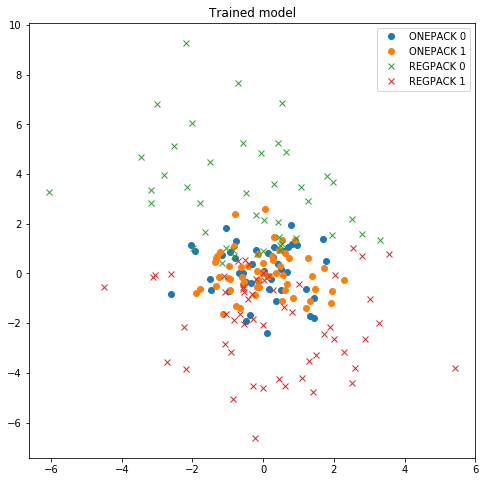

In [8]:

# Show 3-cluster model
fig2, ax2 = plt.subplots(figsize =[8,8])
ax2.set_title('Trained model')
for j in range(ncluster):
    ax2.plot(alldata_a[0, u_orig.argmax(axis=0) == j],
             alldata_a[1, u_orig.argmax(axis=0) == j], 'o',
             label='ONEPACK ' + str(j))
    
for j in range(ncluster):
    ax2.plot(alldata_b[0, u_orig.argmax(axis=0) == j],
             alldata_b[1, u_orig.argmax(axis=0) == j], 'x',
             label='REGPACK ' + str(j))
    
ax2.legend()

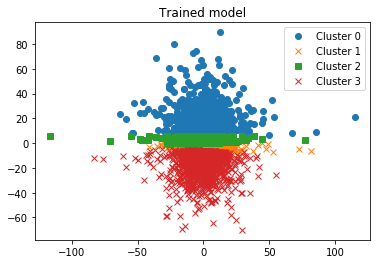

In [30]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']


# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)

for i, x in datasample.iterrows():
    xpts = np.hstack((xpts, np.random.standard_normal(100) * x['Volume'] ))
    ypts = np.hstack((ypts, np.random.standard_normal(100) * x["Gross"]))
    
# Visualize the test data 
alldata = np.vstack((xpts, ypts))

n_cluster = 4
cntr, u_orig, _, _, _, _, _ = fuzz.cluster.cmeans(data=alldata, c=n_cluster,
                                                 m=2, error=0.005, maxiter=100)

# Show 3-cluster model
fig2, ax2 = plt.subplots()
ax2.set_title('Trained model')
symbols = ['o','x','s', 'x', 'x', 'd']
for j in range(n_cluster):
    ax2.plot(alldata[0, u_orig.argmax(axis=0) == j],
             alldata[1, u_orig.argmax(axis=0) == j], symbols[j],
             label='Cluster ' + str(j))
ax2.legend()

In [23]:
cntr

array([[  0.09080718,  13.13314252],
       [ -0.3878724 , -13.97002757],
       [  0.99330415,   0.10081486],
       [ -0.48705964,  -1.55484113],
       [ -0.71291128,   1.31019458]])

In [21]:
u_orig

array([[4.24402989e-03, 6.50549406e-03, 1.44371174e-02, ...,
        5.39590572e-03, 8.01792740e-03, 7.17266882e-04],
       [5.05400900e-01, 3.62957677e-02, 7.60738502e-01, ...,
        7.48367569e-01, 5.13215453e-01, 9.73521481e-01],
       [4.85969730e-01, 2.39557620e-02, 1.80314455e-01, ...,
        2.39678872e-01, 4.70525730e-01, 2.47027564e-02],
       [4.38533958e-03, 9.33242976e-01, 4.45099253e-02, ...,
        6.55765295e-03, 8.24089045e-03, 1.05849524e-03]])